In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Uploading Csv File

In [2]:
data = pd.read_csv(r"D:/newai/Data Analysis Project/World Population Analysis/world_population.csv")

# Data Preprocessing

In [3]:
data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
data.shape

(234, 17)

In [5]:
data.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [6]:
data.dtypes

Rank                             int64
CCA3                            object
Country                         object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [7]:
data['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [8]:
data.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                234
2020 Population                234
2015 Population                234
2010 Population                234
2000 Population                234
1990 Population                234
1980 Population                234
1970 Population                234
Area (km²)                     233
Density (per km²)              234
Growth Rate                    180
World Population Percentage     70
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [10]:
data.describe().style.background_gradient("coolwarm")

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,34074414.709402,33501070.952991,31729956.243590,29845235.034188,26269468.816239,22710220.790598,18984616.970085,15786908.807692,581449.384615,452.127044,1.009577,0.427051
std,67.694165,136766424.804763,135589876.924439,130404992.751760,124218487.632998,111698206.719070,97832173.346751,81785186.084201,67795091.643236,1761840.864063,2066.121904,0.013385,1.714977
min,1.000000,510.000000,520.000000,564.000000,596.000000,651.000000,700.000000,733.000000,752.000000,1.000000,0.026100,0.912000,0.000000
25%,59.250000,419738.500000,415284.500000,404676.000000,393149.000000,327242.000000,264115.750000,229614.250000,155997.000000,2650.000000,38.417875,1.001775,0.010000
50%,117.500000,5559944.500000,5493074.500000,5307400.000000,4942770.500000,4292907.000000,3825409.500000,3141145.500000,2604830.000000,81199.500000,95.346750,1.007900,0.070000
75%,175.750000,22476504.750000,21447979.500000,19730853.750000,19159567.500000,15762301.000000,11869231.000000,9826053.750000,8817329.000000,430425.750000,238.933250,1.016950,0.280000
max,234.000000,1425887337.000000,1424929781.000000,1393715448.000000,1348191368.000000,1264099069.000000,1153704252.000000,982372466.000000,822534450.000000,17098242.000000,23172.266700,1.069100,17.880000


In [11]:
data['Continent'].value_counts()

Continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: count, dtype: int64

In [12]:
data.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [48]:
data.duplicated().sum()

0

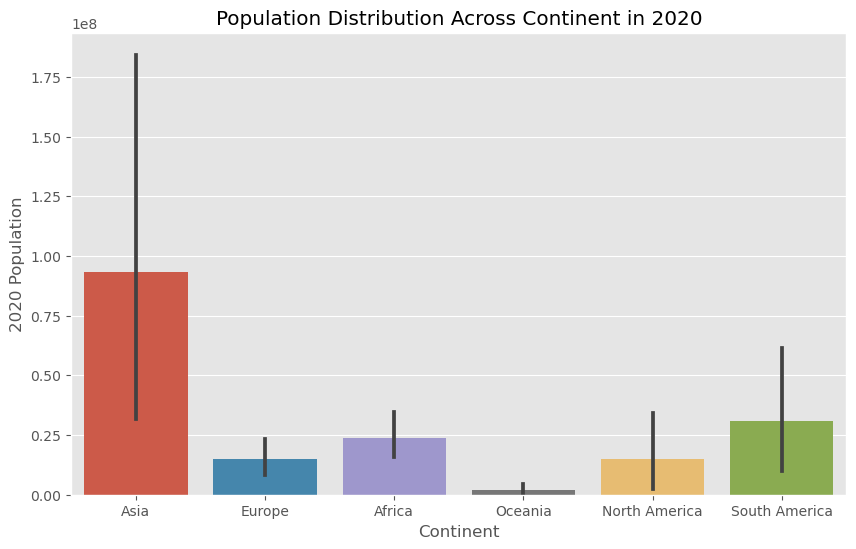

In [13]:
# Plotting population distribution across continents
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Continent', y='2020 Population')
plt.title('Population Distribution Across Continent in 2020');

In [14]:
# finding countries with the highest population in 2020
highest_population_2020 = data.nlargest(5, '2020 Population')
print("Countries with the highest population in 2020:\n", highest_population_2020[['Country', '2022 Population']])

Countries with the highest population in 2020:
            Country  2022 Population
41           China       1425887337
92           India       1417173173
221  United States        338289857
93       Indonesia        275501339
156       Pakistan        235824862


In [15]:
# finding countries with the lowest population in 2020
lowest_population_2020 = data.nlargest(5, '2020 Population')
print("Countries with the lowest population in 2020:\n", lowest_population_2020[['Country', '2022 Population']])

Countries with the lowest population in 2020:
            Country  2022 Population
41           China       1425887337
92           India       1417173173
221  United States        338289857
93       Indonesia        275501339
156       Pakistan        235824862


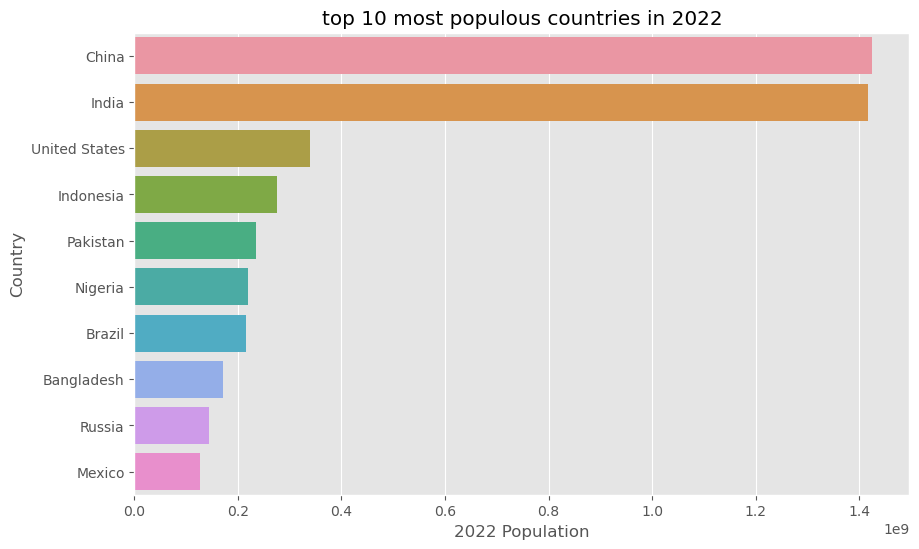

In [16]:
# finding the top 10 most popular countries in 2022
top_10_populous_countries = data.nlargest(10, '2022 Population')

# plotting population of top 10 countries in billions
plt.figure(figsize=(10,6))
sns.barplot(x='2022 Population', y='Country', data=top_10_populous_countries)
plt.title('top 10 most populous countries in 2022');

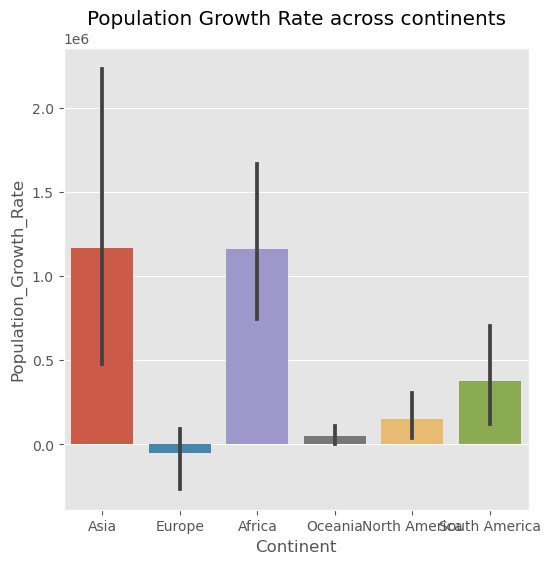

In [17]:
# colculating population growth rate across countries
data['Population_Growth_Rate'] = (data['2022 Population'] - data['2020 Population'])

# plotting population growth rate across continents
plt.figure(figsize=(6,6))
sns.barplot(x='Continent', y='Population_Growth_Rate', data=data)
plt.title('Population Growth Rate across continents');

In [34]:
# Filter the DataFrame for asian countries with population > 100 million 
filter_Asia = data[(data['Continent'] == 'Asia') & (data['2022 Population'] > 100000000)]

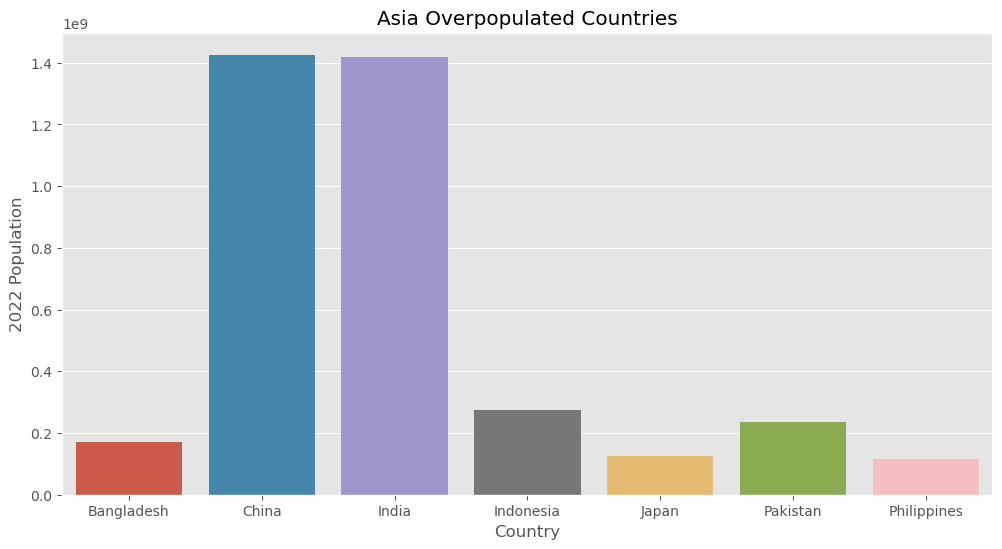

In [35]:
# plotting
plt.figure(figsize=(12,6))
sns.barplot(x='Country', y='2022 Population', data=filter_Asia)
plt.title('Asia Overpopulated Countries');

In [36]:
# Filter the DataFrame for African countries with population > 50 million
filter_Africa = data[(data['Continent']  == 'Africa') & (data['2022 Population'] > 50000000)]

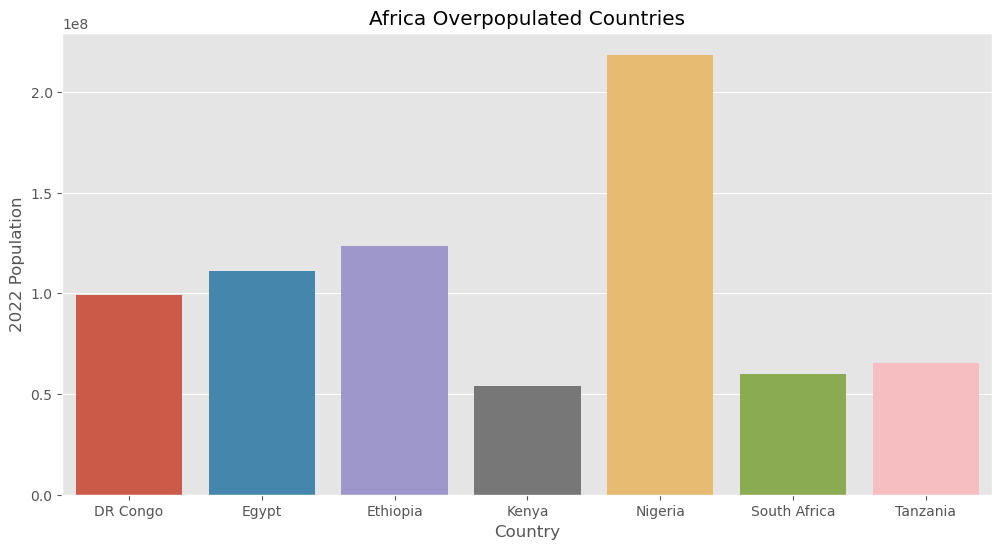

In [37]:
# plotting
plt.figure(figsize=(12,6))
sns.barplot(x='Country', y='2022 Population', data=filter_Africa)
plt.title('Africa Overpopulated Countries');

In [38]:
# Filter the DataFrame for Europe countries with population > 50 million
filter_Europe = data[(data['Continent']  == 'Europe') & (data['2022 Population'] > 50000000)]

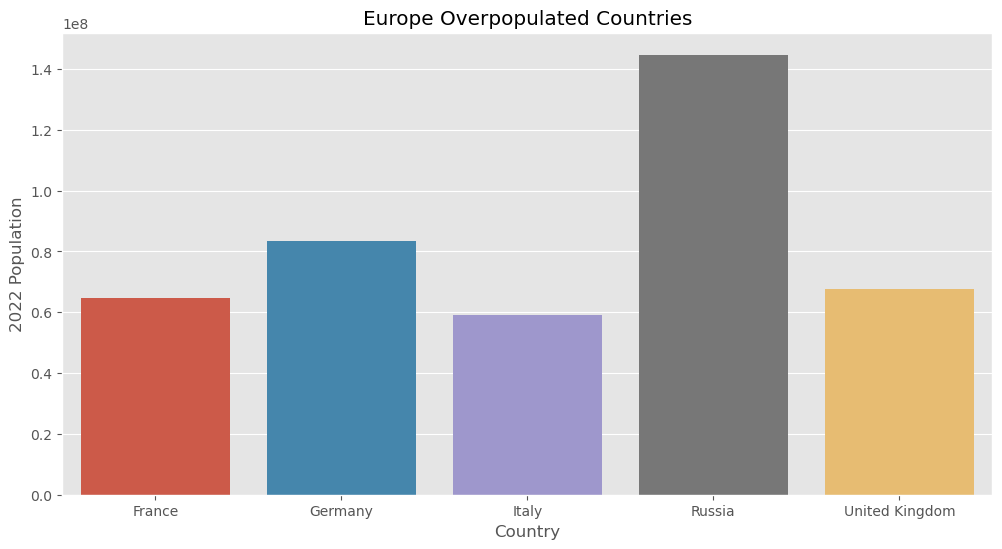

In [39]:
# plotting
plt.figure(figsize=(12,6))
sns.barplot(x='Country', y='2022 Population', data=filter_Europe)
plt.title('Europe Overpopulated Countries');